Описание задачи - https://www.kaggle.com/competitions/riiid-test-answer-prediction/data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [4]:
# Загрузка данных
train_df = pd.read_csv('data/train.csv')
lectures_df = pd.read_csv('data/lectures.csv')
questions_df = pd.read_csv('data/questions.csv')

# Предварительный осмотр данных
display(train_df.head())
display(lectures_df.head())
# информация о лекциях, тегах, отвечающих за предмет, и типах
display(questions_df.head())
# номер правильного ответа, часть теста, к которой ответ относится, и  теги

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [6]:
# Получение информации о столбцах
train_df.info()
lectures_df.info()
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.5+ GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        

In [8]:
# Пропуски в данных
# prior_question_elapsed_time 2351538 пропусков
# prior_question_had_explanation 392506 пропусков
print(train_df.isnull().sum())

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64


In [10]:
print(lectures_df.isnull().sum())

lecture_id    0
tag           0
part          0
type_of       0
dtype: int64


In [12]:
print(questions_df.isnull().sum())
# tags 1 пропуск

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64


In [14]:
# Shape позволит уточнить размерность полученных фремов
# всего 418 лекций, 13523 вопроса и 101230332
print(lectures_df.shape)
print(questions_df.shape)
print(train_df.shape)

(418, 4)
(13523, 5)
(101230332, 10)


In [16]:
# Объединим данные для проведения анализа вопросов
merged_df = pd.merge(train_df[train_df['content_type_id'] == 0], questions_df, left_on='content_id', right_on='question_id')
merged_df.info()
display(merged_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99271300 entries, 0 to 99271299
Data columns (total 15 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
 10  question_id                     int64  
 11  bundle_id                       int64  
 12  correct_answer                  int64  
 13  part                            int64  
 14  tags                            object 
dtypes: float64(1), int64(12), object(2)
memory usage: 11.1+ GB


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,correct_answer,part,tags
0,0,0,115,5692,0,1,3,1,NaN,NaN,5692,5692,3,5,151
1,1,56943,115,5716,0,2,2,1,37000.0,False,5716,5716,2,5,168
2,2,118363,115,128,0,0,0,1,55000.0,False,128,128,0,1,131 149 92
3,3,131167,115,7860,0,3,0,1,19000.0,False,7860,7860,0,1,131 104 81
4,4,137965,115,7922,0,4,1,1,11000.0,False,7922,7922,1,1,131 149 92


In [18]:
# Удаляем пропуски только в определённых столбцах
merged_df_cleaned = merged_df.dropna(subset=['prior_question_elapsed_time', 'prior_question_had_explanation', 'tags'])

# Печать очищенного DataFrame
display(merged_df_cleaned.head())

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,correct_answer,part,tags
1,1,56943,115,5716,0,2,2,1,37000.0,False,5716,5716,2,5,168
2,2,118363,115,128,0,0,0,1,55000.0,False,128,128,0,1,131 149 92
3,3,131167,115,7860,0,3,0,1,19000.0,False,7860,7860,0,1,131 104 81
4,4,137965,115,7922,0,4,1,1,11000.0,False,7922,7922,1,1,131 149 92
5,5,157063,115,156,0,5,2,1,5000.0,False,156,156,2,1,131 101 162 38


In [20]:
# Анализ по тегам.
tag_correctness = merged_df_cleaned.groupby('tags')['answered_correctly'].mean().reset_index()
print(tag_correctness)

                      tags  answered_correctly
0                        1            0.607527
1                    1 162            0.622810
2                10 111 92            0.837507
3               10 164 102            0.761438
4            10 164 162 29            0.879316
...                    ...                 ...
1514              98 97 21            0.720814
1515  98 97 35 117 122 162            0.718192
1516      98 97 35 146 122            0.716996
1517          98 97 46 135            0.684939
1518      98 97 77 135 162            0.888320

[1519 rows x 2 columns]


Учитывая разброс тегов вопросов, какую-то прямую зависимость между признаками определить затруднительно.

   part  answered_correctly
0     1            0.743006
1     2            0.708701
2     3            0.701456
3     4            0.630998
4     5            0.610327
5     6            0.669388
6     7            0.659601


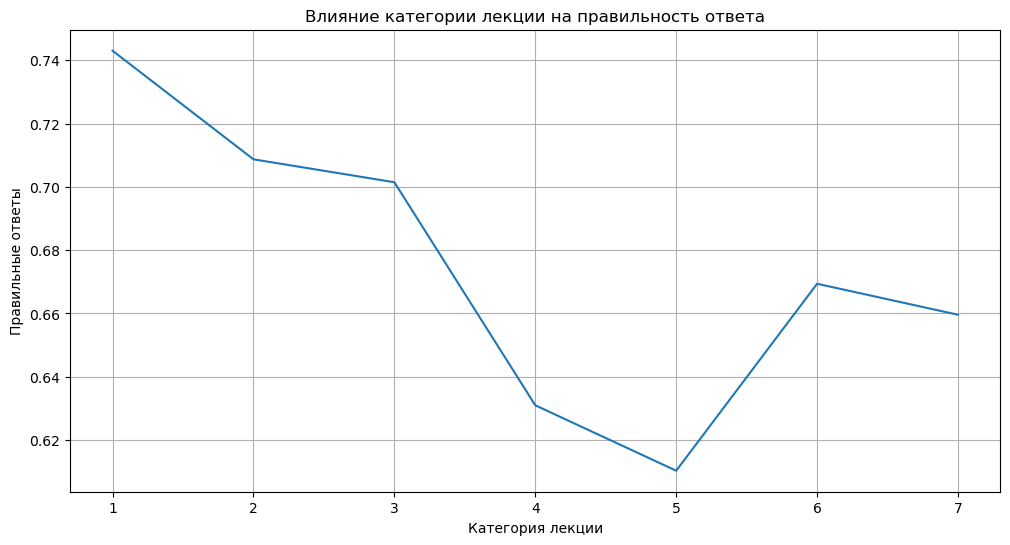

In [22]:
# Анализ по Part
part_correctness = merged_df_cleaned.groupby('part')['answered_correctly'].mean().reset_index()
print(part_correctness)

#Построение графика распределения
plt.figure(figsize=(12, 6))
sns.lineplot(x='part', y='answered_correctly', data=part_correctness)
plt.title('Влияние категории лекции на правильность ответа')
plt.xlabel('Категория лекции')
plt.ylabel('Правильные ответы')
plt.grid()
plt.show()

Из данного графика видна зависимость - наибольшее количество верных ответов приходится на 1 категорию лекций, с 4 по 5 начинается резкое снижение успеваемости.

   answered_correctly  prior_question_elapsed_time
0                   0                 25641.991586
1                   1                 25309.977036


C:\Users\user\AppData\Local\Temp\ipykernel_2584\3920675936.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='answered_correctly', y='prior_question_elapsed_time', data=time_answer, palette='Set2')


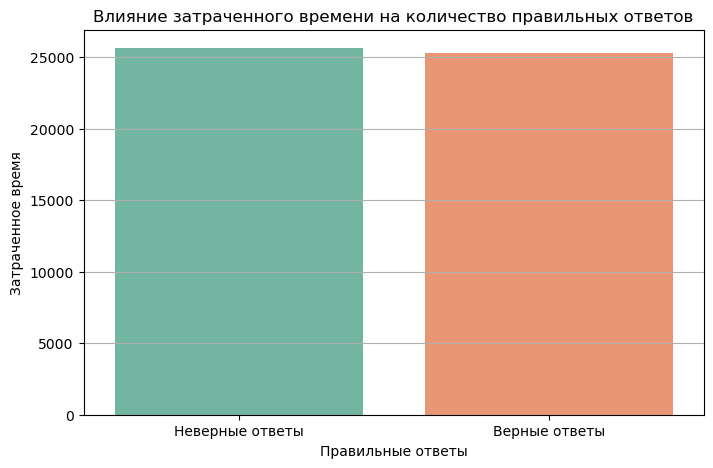

In [104]:
#Анализ затраченного времени на количество правильных ответов
time_answer = merged_df_cleaned.groupby('answered_correctly')['prior_question_elapsed_time'].mean().reset_index()
print(time_answer)

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 5))
sns.barplot(x='answered_correctly', y='prior_question_elapsed_time', data=time_answer, palette='Set2')
plt.title('Влияние затраченного времени на количество правильных ответов')
plt.xlabel('Правильные ответы')
plt.ylabel('Затраченное время')
plt.xticks(ticks=[0, 1], labels=['Неверные ответы', 'Верные ответы'])
plt.grid(axis='y')
plt.show()

Из графика видно, что немного больше времени было затрачено на неправильные ответы, но разница незначительна.

   prior_question_had_explanation  answered_correctly
0                           False            0.500629
1                            True            0.673189


C:\Users\user\AppData\Local\Temp\ipykernel_2584\912916302.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='prior_question_had_explanation', y='answered_correctly', data=explanation_correct, palette='Set2')


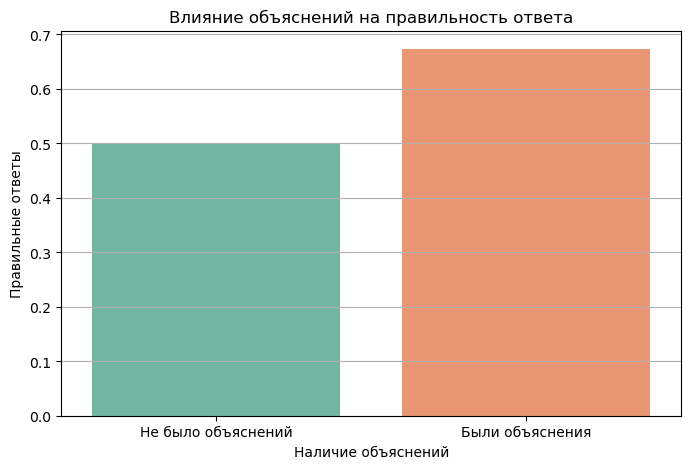

In [116]:
# Влияние объяснений на правильность ответа
explanation_correct = merged_df_cleaned.groupby('prior_question_had_explanation')['answered_correctly'].mean().reset_index()
print(explanation_correct)

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 5))
sns.barplot(x='prior_question_had_explanation', y='answered_correctly', data=explanation_correct, palette='Set2')
plt.title('Влияние объяснений на правильность ответа')
plt.xlabel('Наличие объяснений')
plt.ylabel('Правильные ответы')
plt.xticks(ticks=[0, 1], labels=['Не было объяснений', 'Были объяснения'])
plt.grid(axis='y')
plt.show()

In [ ]:
Из данной диаграммы видно, что наличие объяснений влияет на правильность ответов, зависимость достаточно сильная. 

In [112]:
# Посчитаем процент успешных ответов в объединенной очищенной таблице
all_question = merged_df_cleaned['answered_correctly'].shape[0]
true_question  = merged_df_cleaned[merged_df_cleaned['answered_correctly'] == 1].shape[0]
print(f'Процент успешных ответов {(true_question *100)/all_question:.2f} %')

Процент успешных ответов 65.71 %


   content_type_id  answered_correctly
0                0            0.657145


C:\Users\user\AppData\Local\Temp\ipykernel_2584\703433854.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='content_type_id', y='answered_correctly', data=content_correct, palette='Set2')


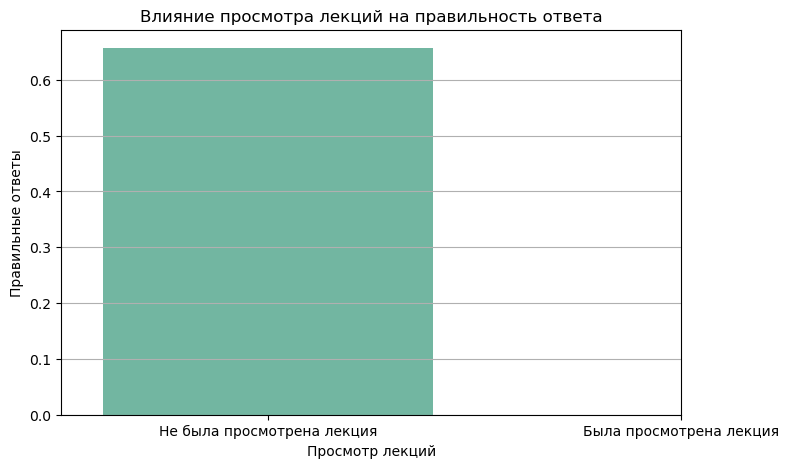

In [160]:
# Влияние заданного вопроса на лекции на правильность ответа
content_correct = merged_df_cleaned.groupby('content_type_id')['answered_correctly'].mean().reset_index()
print(content_correct)

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 5))
sns.barplot(x='content_type_id', y='answered_correctly', data=content_correct, palette='Set2')
plt.title('Влияние просмотра лекций на правильность ответа')
plt.xlabel('Просмотр лекций')
plt.ylabel('Правильные ответы')
plt.xticks(ticks=[0, 1], labels=['Не была просмотрена лекция', 'Была просмотрена лекция'])
plt.grid(axis='y')
plt.show()

Зависимости между просмотром лекции и правильными ответами нет.

      task_container_id  answered_correctly
0                     0            0.656219
1                     1            0.526577
2                     2            0.435621
3                     3            0.543145
4                     4            0.476963
...                 ...                 ...
9995               9995            0.763158
9996               9996            0.769231
9997               9997            0.756757
9998               9998            0.786885
9999               9999            0.738372

[10000 rows x 2 columns]


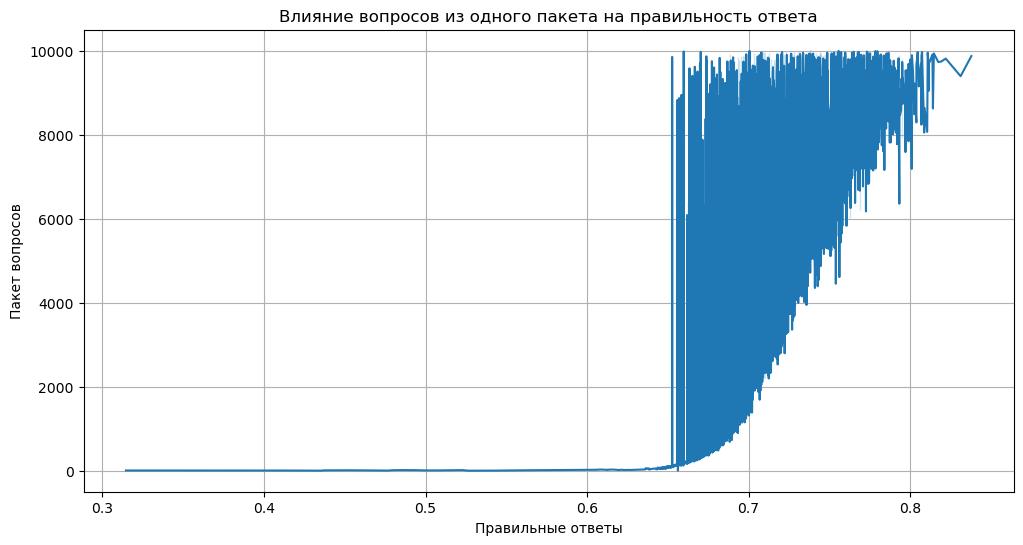

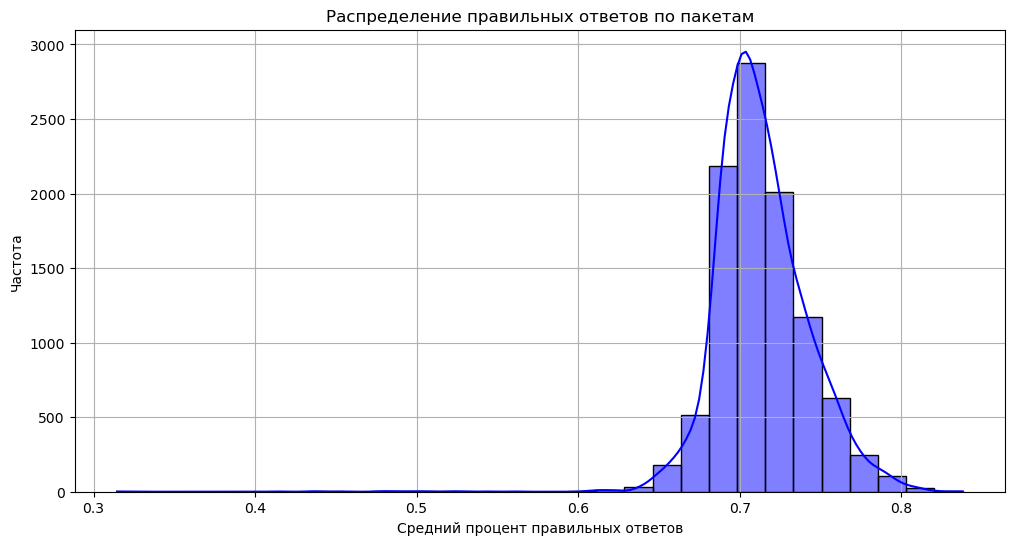

In [156]:
# Анализ по количеству пакетов с вопросами на успеваемость
containers_correctness = merged_df_cleaned.groupby('task_container_id')['answered_correctly'].mean().reset_index()
print(containers_correctness)

#Построение графика распределения
plt.figure(figsize=(12, 6))
sns.lineplot(x='answered_correctly', y='task_container_id', data=containers_correctness)
plt.title('Влияние вопросов из одного пакета на правильность ответа')
plt.xlabel('Правильные ответы')
plt.ylabel('Пакет вопросов')
plt.grid()
plt.show()

# Гистограмма распределения правильных ответов по пакетам
plt.figure(figsize=(12, 6))
sns.histplot(containers_correctness['answered_correctly'], bins=30, kde=True, color='blue')
plt.title('Распределение правильных ответов по пакетам')
plt.xlabel('Средний процент правильных ответов')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Из графиков видно, что есть варианты вопросов из определенного пакета, на которые было дано больше правильных ответов, и на которые было дано меньше правильных ответов.